## Import Packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from clean import CleanData
import seaborn as sns
import json
from googletrans import Translator

## Tobie Code

In [4]:
df = pd.read_csv("new_dfm.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1000 non-null   int64  
 1   Unnamed: 0.1             1000 non-null   int64  
 2   id                       1000 non-null   int64  
 3   text                     962 non-null    object 
 4   createTime               1000 non-null   object 
 5   webVideoUrl              1000 non-null   object 
 6   likeCount                1000 non-null   int64  
 7   shareCount               1000 non-null   int64  
 8   playCount                1000 non-null   int64  
 9   commentCount             1000 non-null   int64  
 10  downloaded               1000 non-null   bool   
 11  mentions                 1000 non-null   object 
 12  hashtags                 1000 non-null   object 
 13  authorMeta.id            1000 non-null   int64  
 14  authorMeta.secUid        

In [6]:
df["translated_lang"].value_counts().head(20)


original sound                                   353
Original sound                                    27
Original sound.                                   20
as original                                       19
Therefore I Am                                     8
Original                                           6
Oh No                                              5
The original sound                                 5
Potential Breakup Song                             4
WITHOUT YOU                                        4
Where Is The Love?                                 4
Original Sound                                     4
What You Know Bout Love                            3
They are original                                  3
Pilfingerdansen - Remix                            3
ruin our friendship                                3
positions                                          2
BILLIE JEAN X BOO X F IT UP VMESHBEATS MASHUP      2
Rocky: Eye of the Tiger                       

In [7]:
df["translated_lang"] = df["translated_lang"].astype(
    str)
df["translated_lang"] = df["translated_lang"].apply(
    lambda x: x.lower())


In [8]:
df["translated_lang"].value_counts().head(20)

original sound                                   384
nan                                              217
original sound.                                   20
as original                                       19
therefore i am                                     8
original                                           6
oh no                                              5
the original sound                                 5
potential breakup song                             4
without you                                        4
where is the love?                                 4
what you know bout love                            3
they are original                                  3
pilfingerdansen - remix                            3
ruin our friendship                                3
sean kingston & justin bieber - eenie meenie       2
billie jean x boo x f it up vmeshbeats mashup      2
oh my god                                          2
sit on the farmer                             

In [9]:
df["original_sound"] = df["translated_lang"].apply(lambda x: True if "original" in  x else False)


In [10]:
df["first_audio"] = df["musicMeta.musicOriginal"]


In [11]:
df[["first_audio","original_sound", "likeRate"]].groupby(
    ["first_audio", "original_sound"]).mean().sort_values(by="likeRate", ascending=False)


likeRate
first_audio original_sound          
1           False           0.106613
            True            0.101524
0           False           0.087618
            True            0.075364

In [12]:
df["original_sound"].value_counts()

False    546
True     454
Name: original_sound, dtype: int64

## Mattheus Code


In [56]:
def plot_bar(ax1, response, response_label, edgecolors, area_color1, area_color2, alpha, legend=False, spines=False, xaxis=False):
    x = avg_df['videoMeta.duration']
    y = avg_df[response]
    ax1.set_xticks(np.arange(min(x), max(x)+1, 1))
    ax1.set_xticklabels([''] * len(np.arange(min(x), max(x)+1, 1)))
    # ax1.set_xticklabels(ax1.get_xticks(),rotation=90)
    # ax1.set_yticks(np.arange(0, max(y)+0.0005, 0.001))
    ax1.set_ylim([min(y),max(y)+0.001])

    x = avg_df[avg_df['authorMeta.verified'] == False]['videoMeta.duration']
    y = avg_df[avg_df['authorMeta.verified'] == False][response]

    # X_Y_Spline = make_interp_spline(x, y)
    # X_ = np.linspace(x.min(), x.max(), 500)
    # Y_ = X_Y_Spline(X_)

    ax1.bar(x,y,color='green',alpha=alpha)
    # l1 = ax1.fill_between(x,y, color=area_color1,alpha=alpha)

    x = avg_df[avg_df['authorMeta.verified'] == True]['videoMeta.duration']
    y = avg_df[avg_df['authorMeta.verified'] == True][response]

    # X_Y_Spline = make_interp_spline(x, y)
    # X_ = np.linspace(x.min(), x.max(), 500)
    # Y_ = X_Y_Spline(X_)

    ax1.bar(x,y,color='blue',alpha=alpha)
    # l2 = ax1.fill_between(x,y,color=area_color2,alpha=alpha)    
    
    # if legend == True:
    #     ax1.legend(handles=[l1,l2], labels=['Not Verified','Verified'], edgecolor='black')

    # ax1.set_xlabel('Video Duration (seconds)', fontdict={'fontsize': 20})
    ax1.set_ylabel(f'{response_label}', fontdict={'fontsize': 14})
    # ax1.set_title(f'Distribution of {response_label}', fontdict={'fontsize': 25})
    
    if spines == True:
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
    
    if xaxis == True:
        ax1.spines['bottom'].set_visible(False)

    ax1.tick_params(axis='both', which='major', labelsize=12.5)

In [57]:
filter_df = df[["first_audio","original_sound",'shareRate','likeRate','commentRate']]
filter_df.loc[:,'first_audio'] = filter_df.loc[:,'first_audio'].replace(1,'True').replace(0,'False')

clean_df = filter_df.groupby(['first_audio','original_sound'],as_index=False).size().rename(columns={"size": "videos_count"})
pivot_df = filter_df.groupby(['first_audio','original_sound'],as_index=False).agg([np.mean])
clean_df['avg_share_rate'] = pivot_df.reset_index()['shareRate'][['mean']]
clean_df['avg_like_rate'] = pivot_df.reset_index()['likeRate'][['mean']]
clean_df['avg_comment_rate'] = pivot_df.reset_index()['commentRate'][['mean']]
clean_df

C:\Users\Mattheus\anaconda3\envs\smm635\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,first_audio,original_sound,videos_count,avg_share_rate,avg_like_rate,avg_comment_rate
0,False,False,249,0.002022,0.087618,0.002088
1,False,True,5,0.000527,0.075364,0.001662
2,True,False,297,0.002086,0.106613,0.002209
3,True,True,449,0.002417,0.101524,0.002816


In [69]:
clean_df[clean_df['first_audio'] == 'True'][response_label]

,first_audio,original_sound,videos_count,avg_share_rate,avg_like_rate,avg_comment_rate
2,True,False,297,0.002086,0.106613,0.002209
3,True,True,449,0.002417,0.101524,0.002816


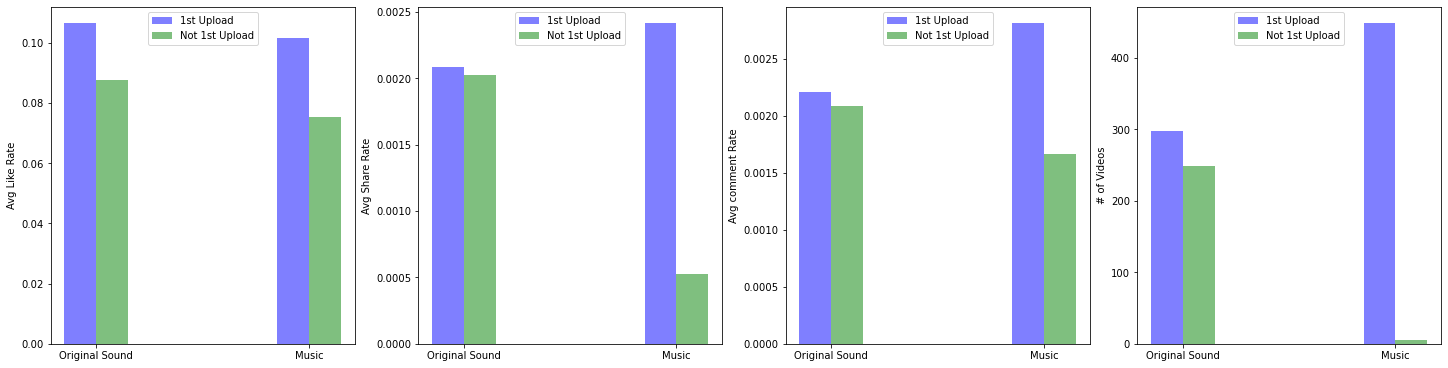

In [117]:
fig = plt.figure(figsize=(20,5),constrained_layout=True)
# fig.suptitle('Music and 1st ppload factors against metrics', fontsize=10)
alpha=0.5
ind = np.arange(2)  # the x locations for the groups
width = 0.15       # the width of the bars

ax1 = fig.add_subplot(141)
response = 'avg_like_rate'

x = clean_df[clean_df['first_audio'] == 'True']['original_sound']
y = clean_df[clean_df['first_audio'] == 'True'][response]
bar1 = ax1.bar(ind, y, width, color='blue',alpha=alpha)

x = clean_df[clean_df['first_audio'] == 'False']['original_sound']
y = clean_df[clean_df['first_audio'] == 'False'][response]
bar2 = ax1.bar(ind + width, y, width, color='green',alpha=alpha)

ax1.set_ylabel('Avg Like Rate')
ax1.set_xticks(ind + width / 2)
ax1.set_xticklabels(('Original Sound', 'Music'))

ax1.legend((bar1[0], bar2[0]), ('1st Upload', 'Not 1st Upload'), loc='upper center')

ax2 = fig.add_subplot(142)
response = 'avg_share_rate'

x = clean_df[clean_df['first_audio'] == 'True']['original_sound']
y = clean_df[clean_df['first_audio'] == 'True'][response]
bar1 = ax2.bar(ind, y, width, color='blue',alpha=alpha)

x = clean_df[clean_df['first_audio'] == 'False']['original_sound']
y = clean_df[clean_df['first_audio'] == 'False'][response]
bar2 = ax2.bar(ind + width, y, width, color='green',alpha=alpha)

ax2.set_ylabel('Avg Share Rate')
ax2.set_xticks(ind + width / 2)
ax2.set_xticklabels(('Original Sound', 'Music'))

ax2.legend((bar1[0], bar2[0]), ('1st Upload', 'Not 1st Upload'), loc='upper center')

ax3 = fig.add_subplot(143)
response = 'avg_comment_rate'

x = clean_df[clean_df['first_audio'] == 'True']['original_sound']
y = clean_df[clean_df['first_audio'] == 'True'][response]
bar1 = ax3.bar(ind, y, width, color='blue',alpha=alpha)

x = clean_df[clean_df['first_audio'] == 'False']['original_sound']
y = clean_df[clean_df['first_audio'] == 'False'][response]
bar2 = ax3.bar(ind + width, y, width, color='green',alpha=alpha)

ax3.set_ylabel('Avg comment Rate')
ax3.set_xticks(ind + width / 2)
ax3.set_xticklabels(('Original Sound', 'Music'))

ax3.legend((bar1[0], bar2[0]), ('1st Upload', 'Not 1st Upload'), loc='upper center')

ax4 = fig.add_subplot(144)
response = 'videos_count'

x = clean_df[clean_df['first_audio'] == 'True']['original_sound']
y = clean_df[clean_df['first_audio'] == 'True'][response]
bar1 = ax4.bar(ind, y, width, color='blue',alpha=alpha)
    
x = clean_df[clean_df['first_audio'] == 'False']['original_sound']
y = clean_df[clean_df['first_audio'] == 'False'][response]
bar2 = ax4.bar(ind + width, y, width, color='green',alpha=alpha)

ax4.set_ylabel('# of Videos')
ax4.set_xticks(ind + width / 2)
ax4.set_xticklabels(('Original Sound', 'Music'))

ax4.legend((bar1[0], bar2[0]), ('1st Upload', 'Not 1st Upload'), loc='upper center')

plt.show()